In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
import pickle
import pathlib
import os
from scipy import stats
import random
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = [10, 5]
#import unicode

from scipy.optimize import curve_fit
import re
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [19]:
#directory = str(pathlib.Path(__file__).parent.resolve())
#script_path = str(pathlib.Path(__file__).parent.resolve())
directory = os.getcwd()
script_path = os.getcwd()
nameset,dictset = [],[]

sortset = []


for filename in os.listdir(directory):
    #print(filename)
    if filename.endswith(".txt") and '._' not in filename:
        #txtcont = txtcont + 1
        #print(filename)
        impath = os.path.join(directory, filename)
        nameset.append(impath)
        this_set = dict()
        with (open(impath, encoding = 'utf8', errors = 'ignore')) as f: #populate dict from text file
            for n in f:
                pog = n.split('\t')
                this_set[pog[0]] = pog[-1].count(',')
            f.close()
        try:
            this_set.pop('cell_name')
            this_set.pop('AB')
        except: pass
        dictset.append(this_set)
        sortset.append((impath,this_set))

print(len(dictset),len(nameset))
print(len(dictset),len(nameset))

#for n in range(0,len(snameset)): print(snameset[n])
#print(type(filename))
#for n in sorted(os.listdir(directory)): print(n)
    
#for n in range(0,len(snameset)): print(snameset[n])
nameset,dictset = [],[]


for n in sorted(sortset):
    nameset.append(n[0]);dictset.append(n[1])

truncator = len(nameset)

30 30
30 30


In [20]:
def remove_dangling_children(oldshi):
    poor = list(oldshi);dishi = dict()
    for n in range(1,len(poor)-1):
        if (len(poor[n]) == len(poor[n+1]) or len(poor[n]) == len(poor[n-1])) == False: dishi[poor[n]] = oldshi[poor[n]]
    return dishi

nameset,dictset = [],[]
for n in sorted(sortset): nameset.append(n[0]);dictset.append(remove_dangling_children(n[1]))

In [21]:
refnodelist = set(dictset[0])
for n in dictset:
    refnodelist = set(n).intersection(refnodelist)

newdictset = []
for n in dictset:
    newdict = dict()
    for i in refnodelist:
        newdict[i] = n[i]
    #print(set(newdict).issubset(set(n)))
    #print(len(newdict))
    newdictset.append(newdict)

#print(set(newdict).issubset(set(n)))
dictset = newdictset

In [24]:
for n in dictset:
    print(len(n))

350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350
350


In [25]:
def scramble(dict_list):
    dict_return = []
    for element in dict_list:
        valuescramble = list(element.values())
        random.shuffle(valuescramble)
        keyscramble = list(element)
        random.shuffle(keyscramble)
        new_element = dict()
        for n in range(0,len(keyscramble)):
            new_element[keyscramble[n]] = valuescramble[n]
        dict_return.append(new_element)
    return dict_return
def globalize(dictn):
    globaldictset = []
    for i in dictn:
        tags = sorted(list(i));dip = dict()
        for n in tags:
            if n[0:-1] in i:
                dip[n] = i[n] + dip[n[:-1]]
            else: dip[n] = i[n]    
        globaldictset.append(dip)
    return globaldictset

In [26]:
def single_dim(namein,dictin,seps = '',tier = False):
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in namelist:
            yaxis.append(dictin[n])
            xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    else:
        for n in namelist:
            if seps in n:
                target_yaxis.append(dictin[n])
                target_xaxis.append(len(re.sub(r'[A-Z]', '', n)))
            else:
                yaxis.append(dictin[n])
                xaxis.append(len(re.sub(r'[A-Z]', '', n)))
    xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    target_xaxis = np.array(target_xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    namein = namein.split('/')[-1][:-4]
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2))
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m))
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2))    
    plt.legend(loc='upper left');plt.show()

In [27]:
scrambledictset = scramble(dictset)
globaldictset = globalize(dictset)
globalscrambledictset = globalize(scrambledictset)

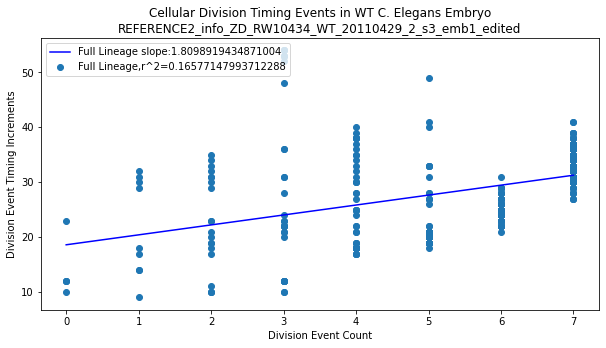

In [28]:
single_dim(nameset[1],dictset[1])

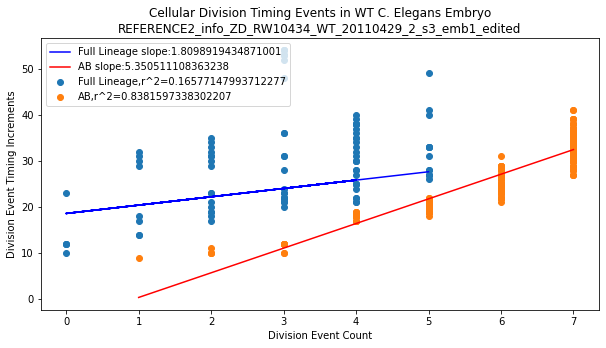

In [29]:
single_dim(nameset[1],dictset[1], seps = 'AB')

In [30]:
#single_dim(nameset[1],scrambledictset[1], seps = 'AB')

In [31]:
#single_dim(nameset[1],scrambledictset[1], seps = 'AB')

In [32]:
#single_dim(nameset[1],globaldictset[1])

In [33]:
#single_dim(nameset[1],globaldictset[1], seps = 'AB')

In [34]:
#single_dim(nameset[1],globalscrambledictset[1])

In [35]:
#single_dim(nameset[1],globalscrambledictset[1], seps = 'AB')

In [38]:
def single_dim_lineage(namein,dictin,tier = False):
    gong = ['AB','C','D','MS','E','P']
    Subsetylist = [[],[],[],[],[],[]]
    Subsetxlist = [[],[],[],[],[],[]]
    namelist,yaxis,xaxis = sorted(list(dictin), key = len ),[],[];target_xaxis=[];target_yaxis=[]
    if True:
        for n in namelist:
            for m in range(0,len(gong)):
                if gong[m] in n:
                    Subsetylist[m].append(dictin[n])
                    Subsetxlist[m].append(len(re.sub(r'[A-Z]', '', n)))
                    continue
    namein = namein.split('/')[-1][:-4]
    for n in range(0,len(Subsetxlist)):
        plt.scatter(np.array(Subsetxlist[n]),Subsetylist[n], label=gong[n], s = [30] * len(Subsetxlist[n]), alpha = .35)
    plt.title('Cellular Division Timing Events in WT C. Elegans Embryo\n'+namein)
    plt.xlabel('Division Event Count');plt.ylabel('Division Event Timing Increments')
    plt.legend(loc='upper left');plt.show()

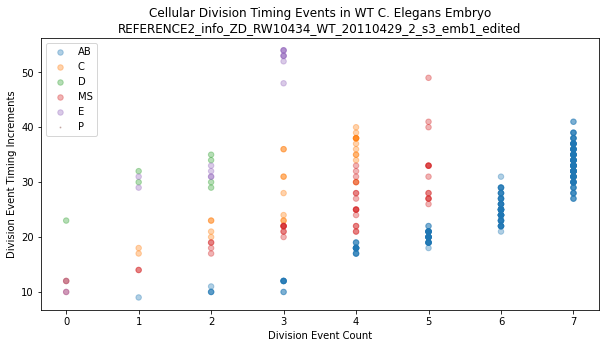

In [39]:
single_dim_lineage(nameset[1],dictset[1])

In [40]:
def dict_to_scatter(name,lis,x,y,img = False,seps='', tier = False):
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    if seps == '' or tier == True:
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    else:
        target_xaxis=[];target_yaxis=[]
        for n in (list(set(lis[x]).intersection(set(lis[y])))):
            if seps in n:
                target_xaxis.append(lis[x][n])
                target_yaxis.append(lis[y][n])
            else:
                xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    if tier == True: return xaxis, yaxis
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    if img == False: return m,b,r,name1,name2
    plt.scatter(xaxis,yaxis, label='Full Lineage,r^2='+str(r**2) ) #''', c = [0]*len(xaxis) ''')
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos');plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    plt.plot(xaxis, (m*xaxis) + b, 'b-', label='Full Lineage slope:'+str(m), )
    if seps != '':
        target_xaxis = np.array(target_xaxis)
        m, b, r, p_value, std_err = stats.linregress(target_xaxis,target_yaxis)
        plt.plot(target_xaxis, (m*target_xaxis) + b, 'r-', label=seps+' slope:'+str(m))
        plt.scatter(target_xaxis,target_yaxis, label = seps+',r^2='+str(r**2) ) #''', c = [1]*len(target_xaxis) ''')
        xaxis = np.append(xaxis,target_xaxis); yaxis = np.append(yaxis,target_yaxis)
    m, b, r, p_value, std_err = stats.linregress(xaxis,yaxis)
    plt.legend(loc='upper left')
    #print(xaxis,target_xaxis)
    #print(np.append(xaxis,target_xaxis))
    #print(yaxis,target_yaxis)
    #print(np.append(yaxis,target_yaxis))
    #plt.savefig(name1+'&'+name2+'.png') #return m,b,r,name1,name2
    plt.show()

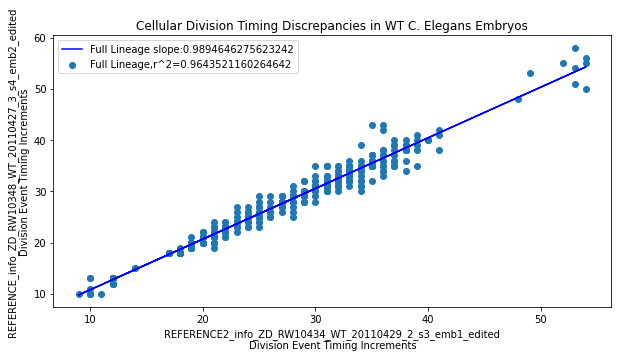

In [41]:
dict_to_scatter(nameset,dictset,1,10,img=True)

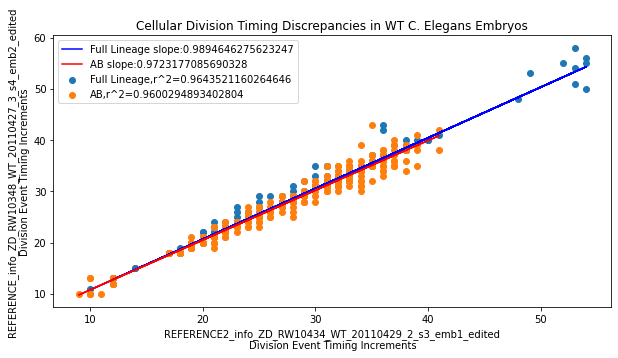

In [42]:
dict_to_scatter(nameset,dictset,1,10,img=True,seps = 'AB')

In [137]:
def dict_to_scatter_lineage(name,lis,x,y,img = False,seps='', tier = False):
    #plt.figure().clear()
    gong = ['AB','C','D','MS','E','P']
    Subsetylist = [[],[],[],[],[],[]]
    Subsetxlist = [[],[],[],[],[],[]]
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        for m in range(0,len(gong)):
            if gong[m] in n:
                Subsetylist[m].append(lis[x][n]);Subsetxlist[m].append(lis[y][n])
                continue
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    for n in range(len(Subsetxlist)):
        plt.scatter(np.array(Subsetxlist[n]),Subsetylist[n], label=gong[n], s = [30] * len(Subsetxlist[n]), alpha = .35)
    plt.legend(loc='upper left')
    fig = plt.figure(1)
    rect = fig.patch
    rect.set_facecolor("white")
    hold = name1+'('+str(x)+')x'+name2+'('+str(y)+')_common'
    #plt.savefig(hold, facecolor=fig.get_facecolor())
    plt.show()
    print(name1+'('+str(x)+')x'+name2+'('+str(y)+')')
    plt.close()
    print(x,y)
    

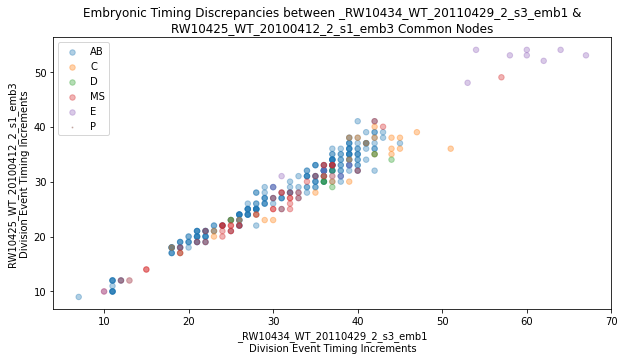

_RW10434_WT_20110429_2_s3_emb1(1)xRW10425_WT_20100412_2_s1_emb3(13)
1 13


In [138]:
dict_to_scatter_lineage(nameset,dictset,1,13,img=True,seps = 'AB')

In [43]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True)

In [44]:
#dict_to_scatter(nameset,globaldictset,1,10,img=True, seps = 'AB')

In [45]:
#dict_to_scatter(nameset,scrambledictset,1,10,img=True)

In [46]:
#dict_to_scatter(nameset,scrambledictset,1,10,img=True,seps = 'AB')

In [47]:
#dict_to_scatter(nameset,globalscrambledictset,1,10,img=True)

In [48]:
#dict_to_scatter(nameset,globalscrambledictset,1,10,img=True,seps = 'AB')

In [49]:
def match_fit(xaxis,yaxis):
    sorted_xaxis = np.array(range(min(xaxis),max(xaxis)))
    xaxis = np.array(xaxis)
    p1 = np.poly1d(np.polyfit(xaxis, yaxis, 1));p2 = np.poly1d(np.polyfit(xaxis, yaxis, 2));p3 = np.poly1d(np.polyfit(xaxis, yaxis, 3))
    plt.scatter(xaxis,yaxis, label='Lineage,r^2=') 
    corr_matrix = np.corrcoef(yaxis, p1(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(xaxis, p1(xaxis), 'b-', label='linear r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p2(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p2(sorted_xaxis), 'r-', label='quad r^2:'+str(R_sq), )
    corr_matrix = np.corrcoef(yaxis, p3(xaxis));corr = corr_matrix[0,1];R_sq = corr**2
    plt.plot(sorted_xaxis, p3(sorted_xaxis), 'g-', label='cubic r^2:'+str(R_sq), )
    plt.title('Cellular Division Timing Discrepancies in WT C. Elegans Embryos')
    #plt.xlabel(name1+'\nDivision Event Timing Increments')
    #plt.ylabel(name2+'\nDivision Event Timing Increments')
    
    
    plt.legend(loc='upper left')
    plt.show()

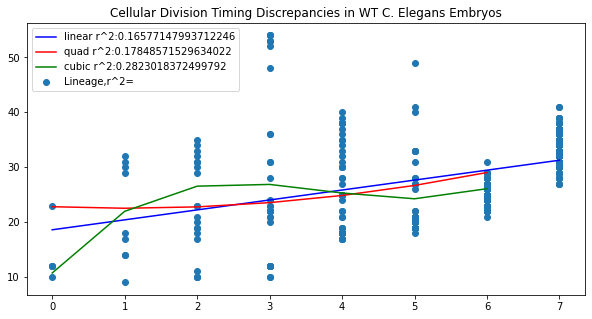

In [50]:
x,y = single_dim(nameset[1],dictset[1],tier = True);match_fit(x,y)

In [51]:
#x,y = single_dim(nameset[1],globaldictset[1],tier = True);match_fit(x,y)

In [52]:
#x,y = single_dim(nameset[1],scrambledictset[1],tier = True);match_fit(x,y)

In [53]:
#x,y = single_dim(nameset[1],globalscrambledictset[1],tier = True);match_fit(x,y)

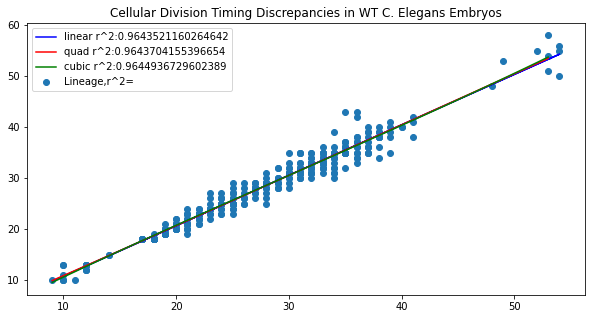

In [35]:
x,y = dict_to_scatter(nameset,dictset,1,10,img=True,tier = True); match_fit(x,y)

In [54]:
#x,y = dict_to_scatter(nameset,globaldictset,1,10,img=True,tier = True); match_fit(x,y)

In [55]:
#x,y = dict_to_scatter(nameset,scrambledictset,1,10,img=True,tier = True); match_fit(x,y)

In [56]:
#x,y = dict_to_scatter(nameset,globalscrambledictset,1,10,img=True,tier = True); match_fit(x,y)

In [57]:
def plot_2_examples(colormaps,imp): #heatmap matrix plotting function
    data = imp;n = len(colormaps)
    #n = 40
    fig, axs = plt.subplots(1, n, figsize=(n, n),
                            constrained_layout=False, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=(int(10*np.amin(imp))/10.0), vmax=(int(10*np.amax(imp))/10.0))
        fig.colorbar(psm, ax=ax)
    plt.title('Distance between times in WT C. Elegans')
    #plt.figure(figsize = (15,8))
    plt.gcf().set_size_inches(8, 8)
    plt.show()

In [58]:
'''
https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py
'''

'\nhttps://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html#sphx-glr-auto-examples-neighbors-plot-kde-1d-py\n'

In [60]:
r_mat = [];g_mat = [];s_mat=[];gs_mat=[]
for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,dictset,n,m)
        r_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,globaldictset,n,m)
        g_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,scrambledictset,n,m)
        s_row.append(r**2)
        m2,b,r,name1,name2 = dict_to_scatter(nameset,globalscrambledictset,n,m)
        gs_row.append(r**2)
    zee = ( [0] * (30 - m - 1))
    r_mat.append(r_row+zee);g_mat.append(g_row+zee);s_mat.append(s_row+zee);gs_mat.append(gs_row+zee)
    #print(len(zee))
#r_mat.reverse()
r_mat = (np.mat(r_mat).T + np.mat(r_mat)) - np.diag([1]*len(r_mat))
g_mat = (np.mat(g_mat).T + np.mat(g_mat)) - np.diag([1]*len(g_mat))
s_mat = (np.mat(s_mat).T + np.mat(s_mat)) - np.diag([1]*len(s_mat))
gs_mat = (np.mat(gs_mat).T + np.mat(gs_mat)) - np.diag([1]*len(gs_mat))

sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = []

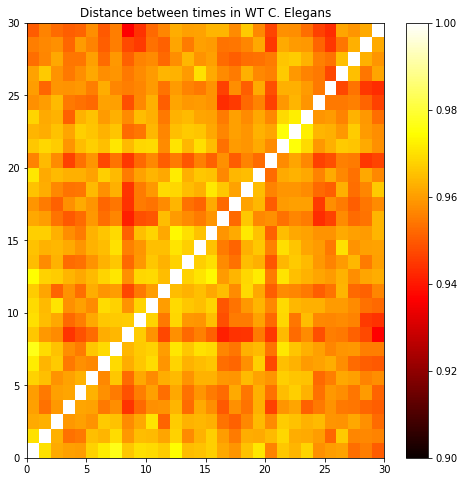

In [61]:
plot_2_examples(['hot'],np.mat(r_mat)) #r^2 of plots

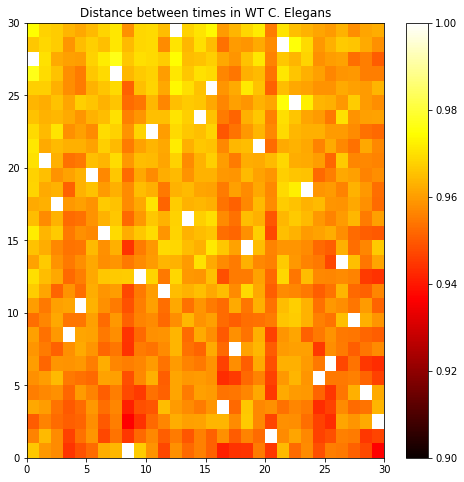

[matrix([[ 8, 20, 29, 16, 28, 24, 25, 17,  3, 27,  4, 11,  9, 26, 18,  6,
          13,  2, 23,  5,  1, 19, 10, 14, 22, 15,  7,  0, 21, 12]])]

In [62]:
x = np.argsort(r_mat.sum(axis=0))
plot_2_examples(['hot'],np.mat(r_mat[x][0]))
sortlists.append(x)
sortlists

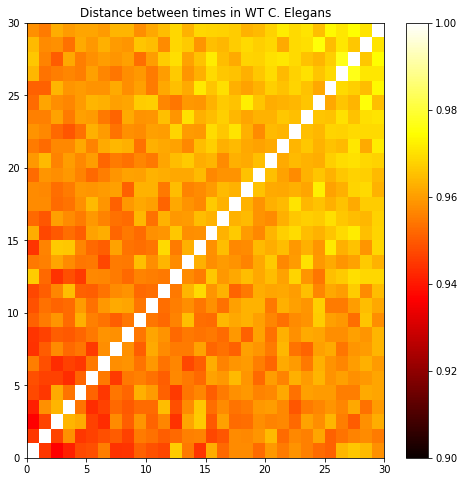

In [73]:
plot_2_examples(['hot'],np.mat(r_mat[x][0]).T[x][0]  )     #.T[x])

In [44]:
#clustering = AgglomerativeClustering(n_clusters = 2).fit(np.mat(r_mat))
#np.where(clustering.labels_ > 0)

In [210]:
np.argsort(r_mat.sum(axis=0))

matrix([[ 8, 20, 29, 16, 28, 24, 25, 17,  3, 27,  4, 11,  9, 26, 18,  6,
         13,  2, 23,  5,  1, 19, 10, 14, 22, 15,  7,  0, 21, 12]])

In [211]:
#This plots all of the distances between nodes
'''trip = np.triu(np.mat(r_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''
''''''

''

(array([2., 0., 5., 2., 0., 2., 1., 2., 1., 5., 3., 3., 1., 2., 1.]),
 array([28.64057259, 28.66391968, 28.68726677, 28.71061386, 28.73396095,
        28.75730804, 28.78065513, 28.80400222, 28.82734931, 28.85069641,
        28.8740435 , 28.89739059, 28.92073768, 28.94408477, 28.96743186,
        28.99077895]),
 <BarContainer object of 15 artists>)

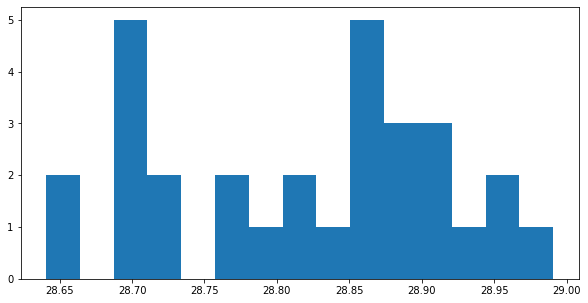

In [212]:
#returns aggregate distances between nodes
#rip = np.triu(np.mat(r_mat))
#trip = np.sort(trip.flatten())
#trip = trip[int(len(trip)/2):-truncator]

trip = r_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )

' '

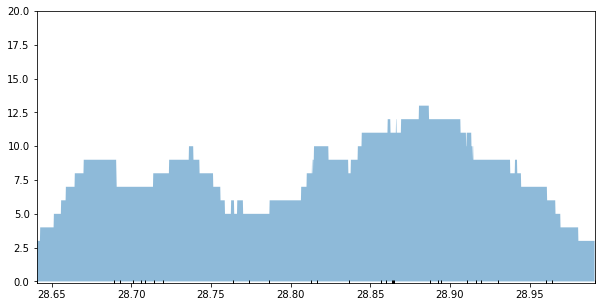

In [213]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .05) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 20]);
''' '''

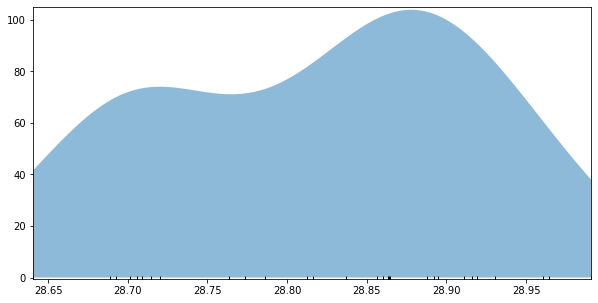

In [214]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.05).pdf(x_d) for xi in trip) * 1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.5), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 105]);

In [215]:
#plot_2_examples(['hot'],np.mat(g_mat)) #r^2 of 

In [216]:
'''x = np.argsort(g_mat.sum(axis=0))
plot_2_examples(['hot'],np.mat(g_mat[x][0]))
sortlists.append(x)
sortlists'''

"x = np.argsort(g_mat.sum(axis=0))\nplot_2_examples(['hot'],np.mat(g_mat[x][0]))\nsortlists.append(x)\nsortlists"

In [217]:
#plot_2_examples(['hot'],np.mat(g_mat[x][0]).T[x][0]  )     #.T[x])

In [218]:
'''trip = np.triu(np.mat(g_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )
'''
'''
trip = g_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )'''

'\ntrip = g_mat.sum(axis=0).tolist()[0]\ntrip\n\nplt.hist(trip, bins = 15 )'

In [219]:
'''
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < .05) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 100]);'''

"\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < .05) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 100]);"

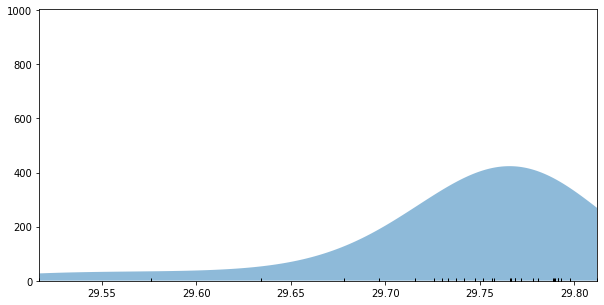

In [56]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,.04).pdf(x_d) for xi in trip) * 2
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.5), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1005]);

In [57]:
#plot_2_examples(['hot'],np.mat(s_mat))

In [58]:
'''trip = np.triu(np.mat(s_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''

'trip = np.triu(np.mat(s_mat))\ntrip = np.sort(trip.flatten())\ntrip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = truncator )'

In [59]:
#plot_2_examples(['hot'],np.mat(gs_mat))

In [60]:
'''trip = np.triu(np.mat(gs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2):-truncator]

plt.hist(trip, bins = truncator )'''

'trip = np.triu(np.mat(gs_mat))\ntrip = np.sort(trip.flatten())\ntrip = trip[int(len(trip)/2):-truncator]\n\nplt.hist(trip, bins = truncator )'

In [61]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 0.02) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 120]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 0.02) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 120]);"

In [89]:
'''def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))
#I guess issa metric
ted_list = []
t_mat = []
for n in range(0,len(nameset)):
    r_row = []
    for m in range(0,n+1):
        k = tree_edit_distance(dictset[n],dictset[m])
        r_row.append(k)
        ted_list.append(k)
    zee = ( [0] * (30 - m - 1))
    t_mat.append(r_row+zee)

t_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))
'''
#for n in ted_list: print(n)

'def tree_edit_distance(dict1,dict2): return (len((set(dict1).union(set(dict2))))-len((set(dict1).intersection(set(dict2)))))\n#I guess issa metric\nted_list = []\nt_mat = []\nfor n in range(0,len(nameset)):\n    r_row = []\n    for m in range(0,n+1):\n        k = tree_edit_distance(dictset[n],dictset[m])\n        r_row.append(k)\n        ted_list.append(k)\n    zee = ( [0] * (30 - m - 1))\n    t_mat.append(r_row+zee)\n\nt_mat = (np.mat(t_mat).T + np.mat(t_mat)) - np.diag([1]*len(t_mat))\n'

In [91]:
#plot_2_examples(['hot_r'],np.mat(t_mat))

In [111]:
'''
x = np.argsort(t_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(t_mat[x][0]))
sortlists.append(x)
sortlists'''

"\nx = np.argsort(t_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nplot_2_examples(['hot_r'],np.mat(t_mat[x][0]))\nsortlists.append(x)\nsortlists"

In [113]:
#x

In [114]:
'''trip = np.triu(np.mat(t_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''

'''
trip = t_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )'''

'\ntrip = t_mat.sum(axis=0).tolist()[0]\ntrip\n\nplt.hist(trip, bins = 15 )'

In [115]:
''' 
https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
https://www.wessa.net/rwasp_density.wasp#output
'''
'''
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 50) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.5, 25]);'''

"\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 50) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.5, 25]);"

In [116]:
'''
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,20).pdf(x_d) for xi in trip) *1
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);'''

"\nfrom scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,20).pdf(x_d) for xi in trip) *1\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 1]);"

In [117]:
'''ted_mat_reals = np.where(-abs(np.array(t_mat)-20)+19 > 0, -1, 0)
#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))
#print(ted_mat_real)
plot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges'''

"ted_mat_reals = np.where(-abs(np.array(t_mat)-20)+19 > 0, -1, 0)\n#for n in range(len(np.array(ted_mat_real))): ted_mat_real[n][n] = (-np.sum(np.array(ted_mat_real)[n]))\n#print(ted_mat_real)\nplot_2_examples(['hot'],np.mat(ted_mat_reals)) #black are edges"

In [118]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [119]:
b_mat = [];bg_mat = [];bs_mat=[];bgs_mat=[]

for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        r_row.append(branch_distance(dictset[n],dictset[m]))
        g_row.append(branch_distance(globaldictset[n],globaldictset[m]))
        s_row.append(branch_distance(scrambledictset[n],scrambledictset[m]))
        gs_row.append(branch_distance(globalscrambledictset[n],globalscrambledictset[m]))
    zee = ( [0] * (30 - m - 1))
    b_mat.append(r_row+zee);bg_mat.append(g_row+zee);bs_mat.append(s_row+zee);bgs_mat.append(gs_row+zee)
    #print(len(zee))
#r_mat.reverse()
b_mat = (np.mat(b_mat).T + np.mat(b_mat)) - np.diag([1]*len(b_mat))
bg_mat = (np.mat(bg_mat).T + np.mat(bg_mat)) - np.diag([1]*len(bg_mat))
bs_mat = (np.mat(bs_mat).T + np.mat(bs_mat)) - np.diag([1]*len(bs_mat))
bgs_mat = (np.mat(bgs_mat).T + np.mat(bgs_mat)) - np.diag([1]*len(bgs_mat))

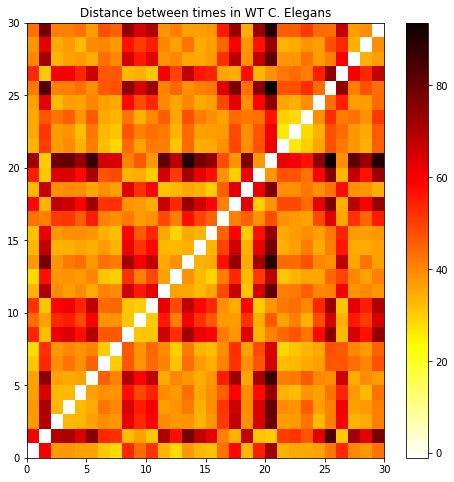

In [140]:
plot_2_examples(['hot_r'],np.mat(b_mat))

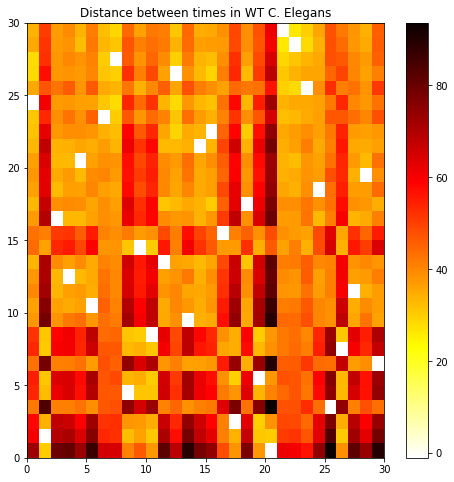

[matrix([[ 8, 20, 29, 16, 28, 24, 25, 17,  3, 27,  4, 11,  9, 26, 18,  6,
          13,  2, 23,  5,  1, 19, 10, 14, 22, 15,  7,  0, 21, 12]]),
 matrix([[23, 25, 22,  5, 17,  1, 21, 27,  2, 18, 20,  6, 24, 15, 16, 13,
          19,  4, 26, 10,  7, 11, 29,  3,  8,  9, 28, 12,  0, 14]]),
 matrix([[29, 28,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
          15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,  0]]),
 matrix([[20,  1, 17, 25,  8, 19, 29, 26, 10, 13,  5, 27,  3, 11,  9, 16,
           2, 18, 24, 28,  4, 14, 15,  6,  0, 23, 12,  7, 22, 21]]),
 matrix([[20,  1, 17, 25,  8, 19, 29, 26, 10, 13,  5, 27,  3, 11,  9, 16,
           2, 18, 24, 28,  4, 14, 15,  6,  0, 23, 12,  7, 22, 21]])]

In [121]:
x = np.argsort(b_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))
sortlists.append(x)
sortlists

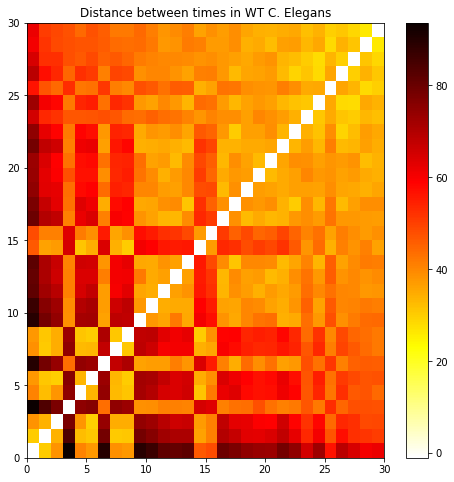

In [143]:
plot_2_examples(['hot_r'],np.mat(b_mat[x][0]).T[x][0]  )   

(array([4., 4., 5., 6., 1., 3., 1., 2., 2., 1., 0., 0., 0., 0., 1.]),
 array([1141.21084182, 1192.0195349 , 1242.82822798, 1293.63692106,
        1344.44561414, 1395.25430722, 1446.0630003 , 1496.87169338,
        1547.68038646, 1598.48907954, 1649.29777262, 1700.1064657 ,
        1750.91515878, 1801.72385186, 1852.53254494, 1903.34123802]),
 <BarContainer object of 15 artists>)

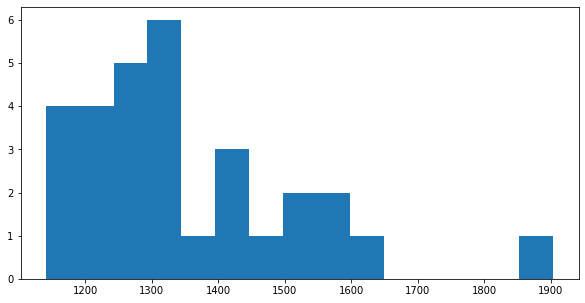

In [122]:
'''
trip = np.triu(np.mat(b_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )

'''
trip = b_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )



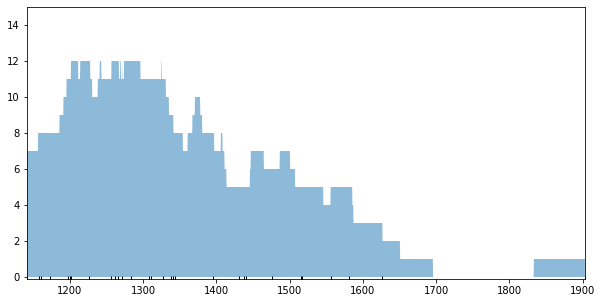

In [123]:
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 70) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 15]);

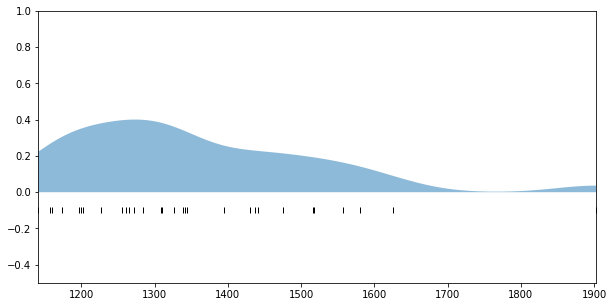

In [124]:
from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,55).pdf(x_d) for xi in trip) * 5
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 3, 2,
       2, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

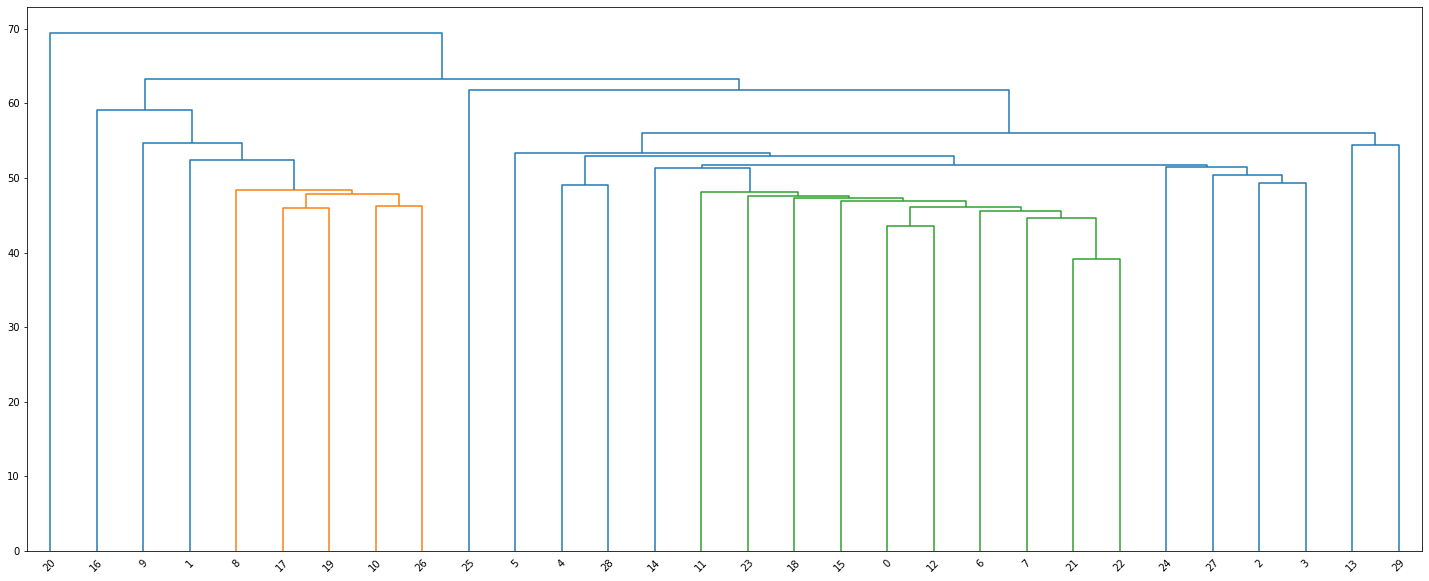

In [139]:
Z = linkage(np.mat(b_mat), 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=3, criterion='maxclust')

In [151]:
np.where((fcluster(Z, t=3, criterion='maxclust') > 1)),np.where((fcluster(Z, t=3, criterion='maxclust') < 2))

((array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),),
 (array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),))

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

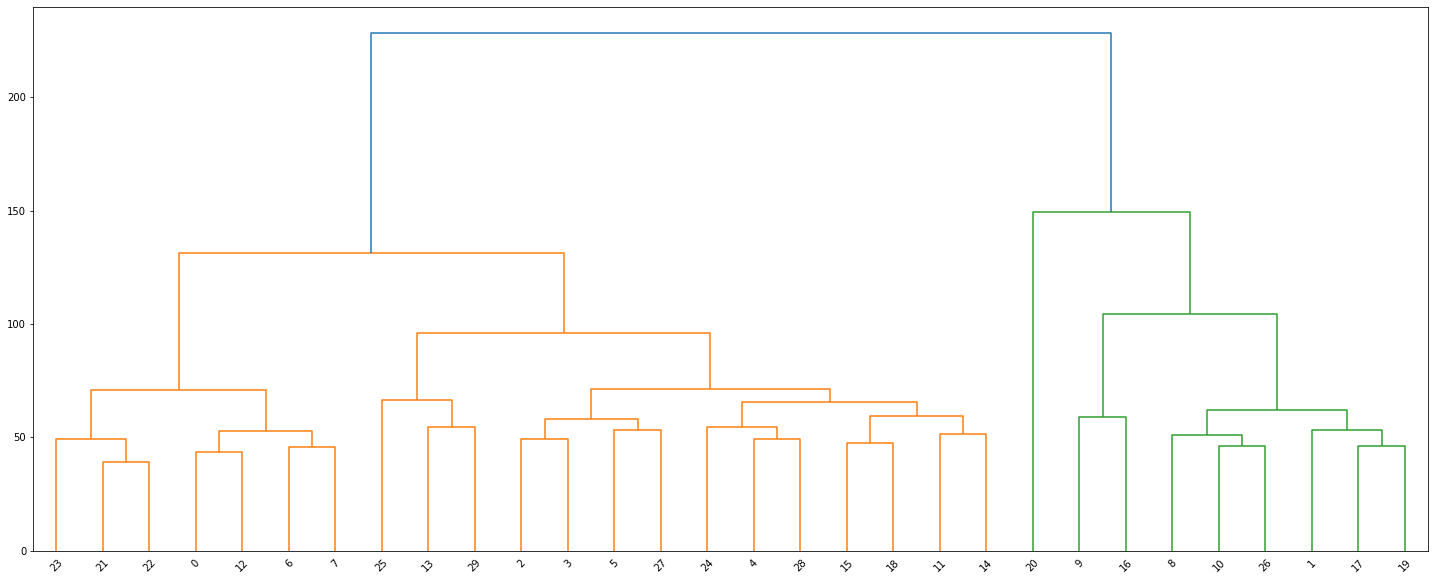

In [152]:
Z = linkage(np.mat(b_mat), 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust')

In [153]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),))

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

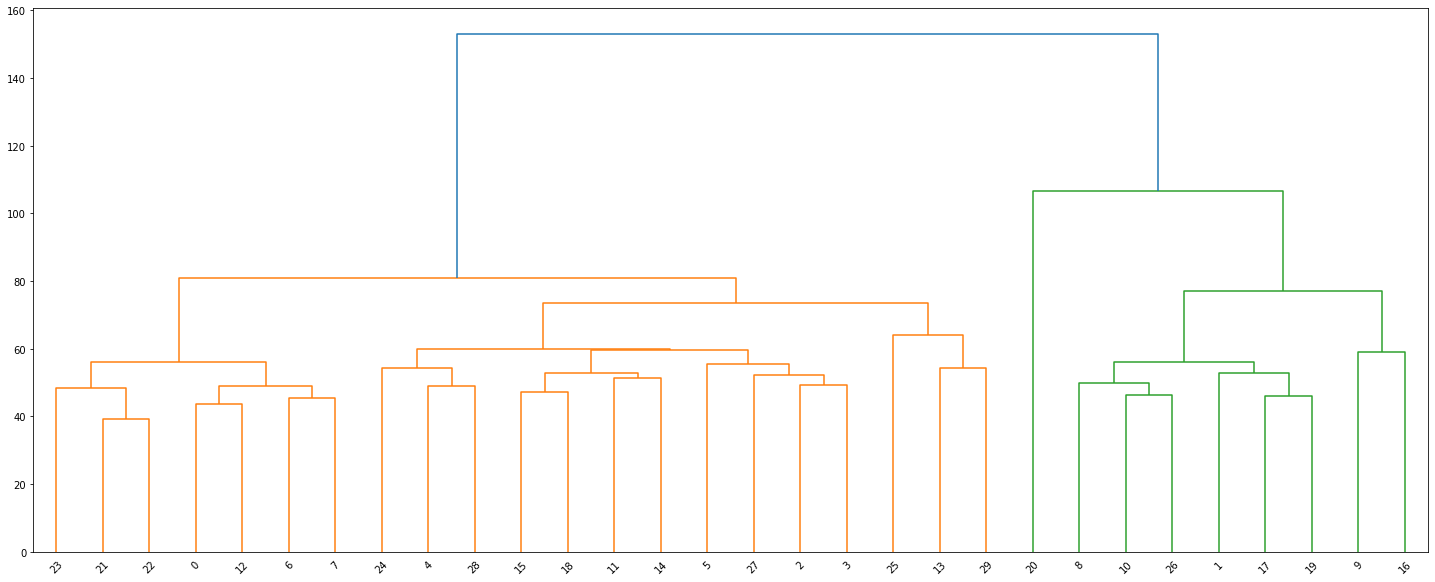

In [166]:
Z = linkage(np.mat(b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust') 

In [155]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),))

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

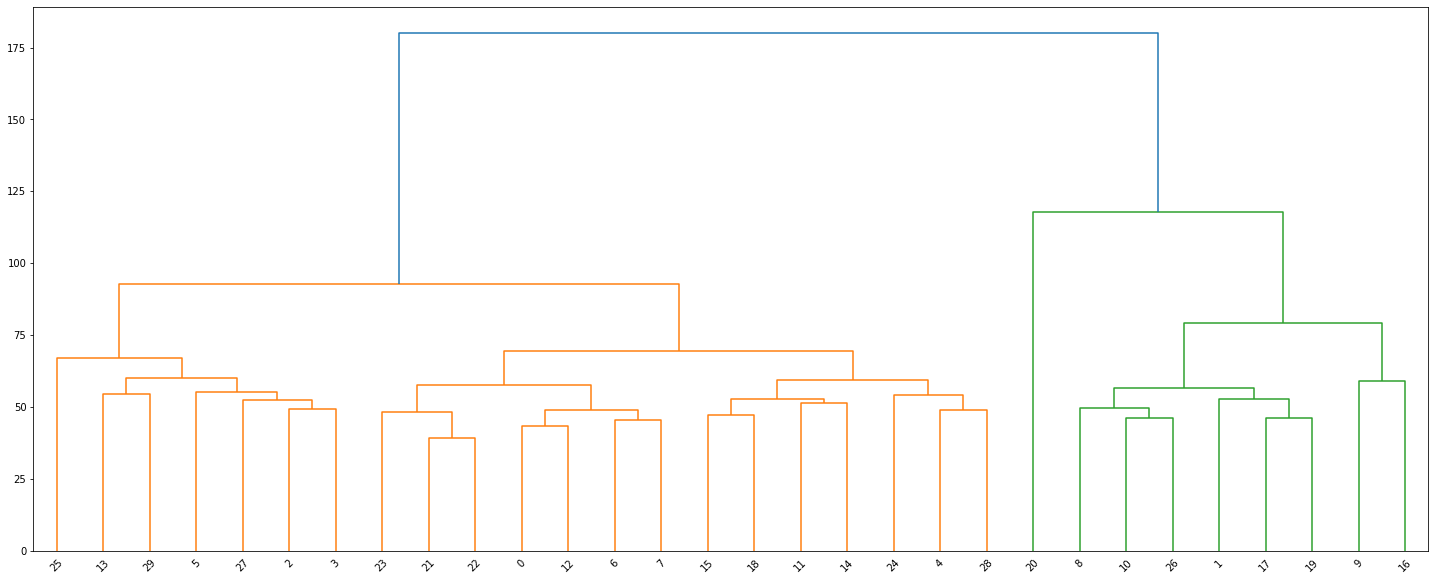

In [156]:
Z = linkage(np.mat(b_mat), 'weighted')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust')

In [157]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),))

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

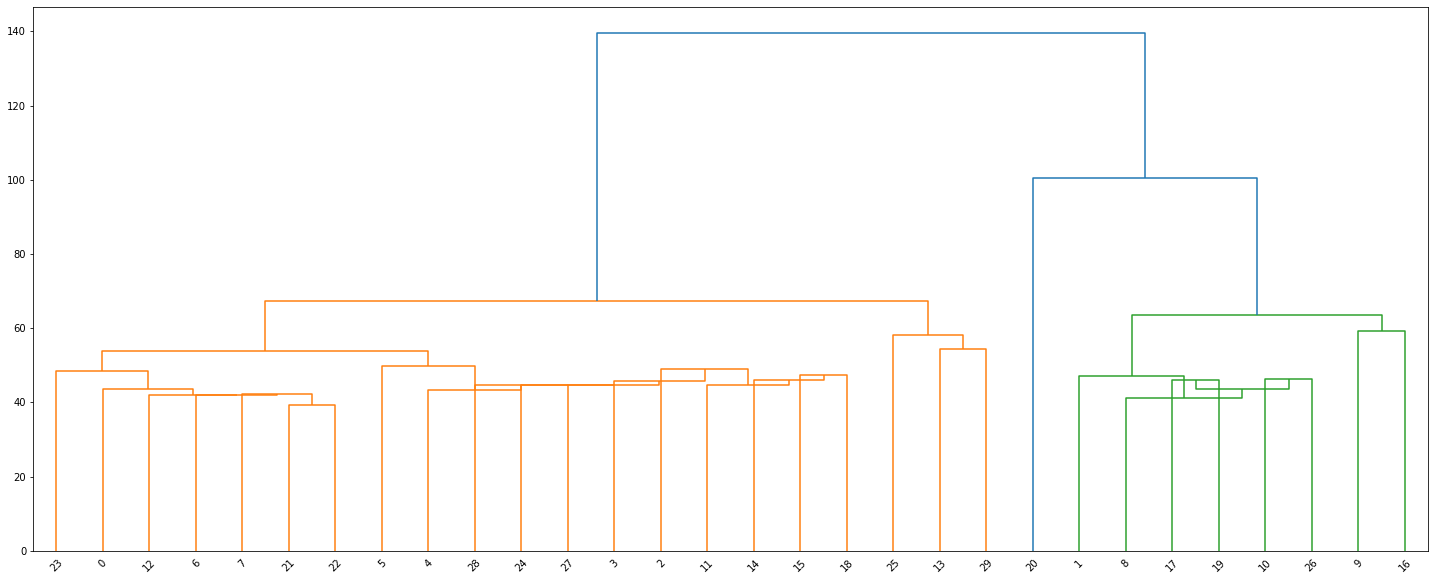

In [158]:
Z = linkage(np.mat(b_mat), 'centroid')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust')

In [159]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),))

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

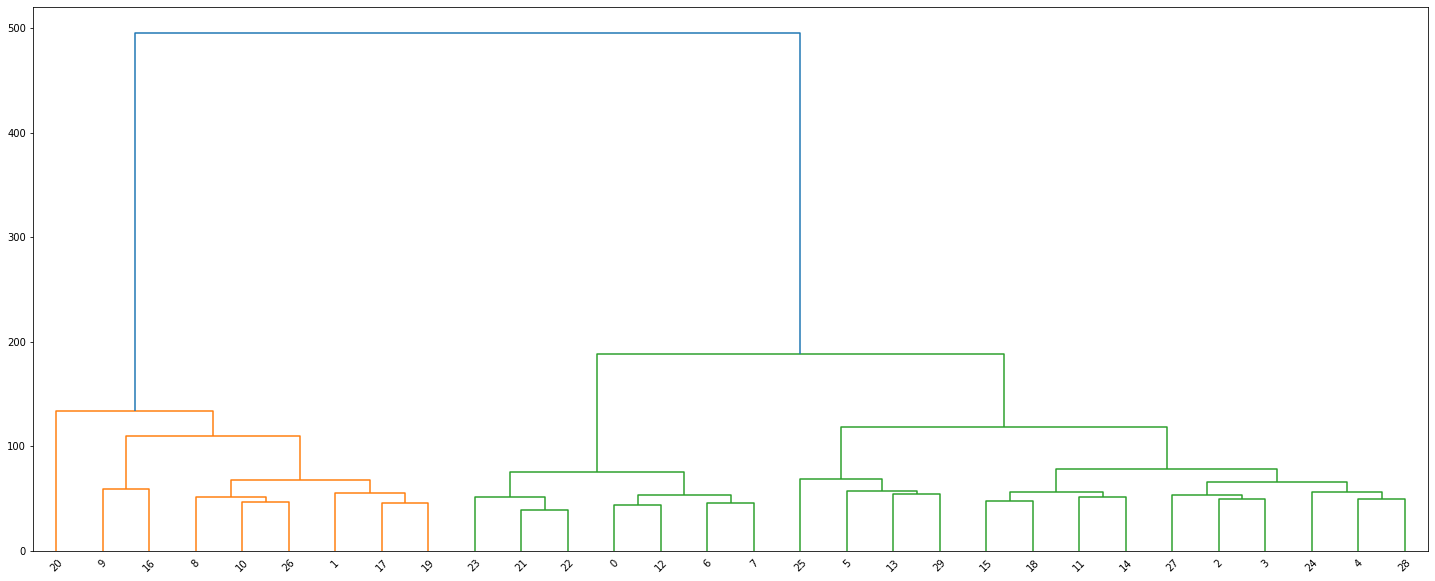

In [160]:
Z = linkage(np.mat(b_mat), 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z[0:])
fcluster(Z, t=2, criterion='maxclust')

In [161]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),),
 (array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),))

In [162]:
for n in np.where((fcluster(Z, t=2, criterion='maxclust') > 1))[0]: print(n, nameset[n].split('/')[-1])#'''

0 REFERENCE1_info_ZD_RW10348_WT_20110427_3_s2_emb1_edited.txt
2 REFERENCE_info_ZD_RW10348_WT_20110126_2_s1_emb2_edited.txt
3 REFERENCE_info_ZD_RW10348_WT_20110126_2_s1_emb3_edited.txt
4 REFERENCE_info_ZD_RW10348_WT_20110126_2_s2_emb1_edited.txt
5 REFERENCE_info_ZD_RW10348_WT_20110126_2_s2_emb2_edited.txt
6 REFERENCE_info_ZD_RW10348_WT_20110427_3_s1_emb1_edited.txt
7 REFERENCE_info_ZD_RW10348_WT_20110427_3_s1_emb2_edited.txt
11 REFERENCE_info_ZD_RW10425_WT_20100412_2_s1_emb1_edited.txt
12 REFERENCE_info_ZD_RW10425_WT_20100412_2_s1_emb2_edited.txt
13 REFERENCE_info_ZD_RW10425_WT_20100412_2_s1_emb3_edited.txt
14 REFERENCE_info_ZD_RW10425_WT_20100412_2_s2_emb1_edited.txt
15 REFERENCE_info_ZD_RW10425_WT_20100412_2_s2_emb2_edited.txt
18 REFERENCE_info_ZD_RW10425_WT_20110428_3_s2_emb1_edited.txt
21 REFERENCE_info_ZD_RW10434_20110126_2_s3_emb1_edited.txt
22 REFERENCE_info_ZD_RW10434_20110126_2_s3_emb2_edited.txt
23 REFERENCE_info_ZD_RW10434_20110126_2_s4_emb1_edited.txt
24 REFERENCE_info_ZD_RW

In [163]:
for n in np.where((fcluster(Z, t=2, criterion='maxclust') < 2))[0]: print(n, nameset[n].split('/')[-1])#'''

1 REFERENCE2_info_ZD_RW10434_WT_20110429_2_s3_emb1_edited.txt
8 REFERENCE_info_ZD_RW10348_WT_20110427_3_s2_emb2_edited.txt
9 REFERENCE_info_ZD_RW10348_WT_20110427_3_s4_emb1_edited.txt
10 REFERENCE_info_ZD_RW10348_WT_20110427_3_s4_emb2_edited.txt
16 REFERENCE_info_ZD_RW10425_WT_20110428_3_s1_emb1_edited.txt
17 REFERENCE_info_ZD_RW10425_WT_20110428_3_s1_emb3_edited.txt
19 REFERENCE_info_ZD_RW10425_WT_20110428_3_s2_emb3_edited.txt
20 REFERENCE_info_ZD_RW10425_WT_20110428_3_s3_emb1_edited.txt
26 REFERENCE_info_ZD_RW10434_WT_20110429_2_s1_emb1_edited.txt


In [167]:
oop = np.where((fcluster(Z, t=2, criterion='maxclust') > 1))[0].tolist()
#plot_2_examples(['hot_r'],np.mat(b_mat[x][0]))
oop

[1, 8, 9, 10, 16, 17, 19, 20, 26]

In [168]:
oop = np.array(oop + np.where((fcluster(Z, t=2, criterion='maxclust') < 2))[0].tolist())
oop

array([ 1,  8,  9, 10, 16, 17, 19, 20, 26,  0,  2,  3,  4,  5,  6,  7, 11,
       12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29])

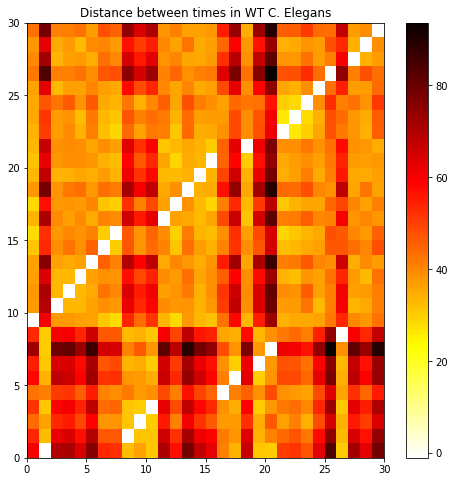

In [170]:
plot_2_examples(['hot_r'],(np.mat(b_mat)[oop]))

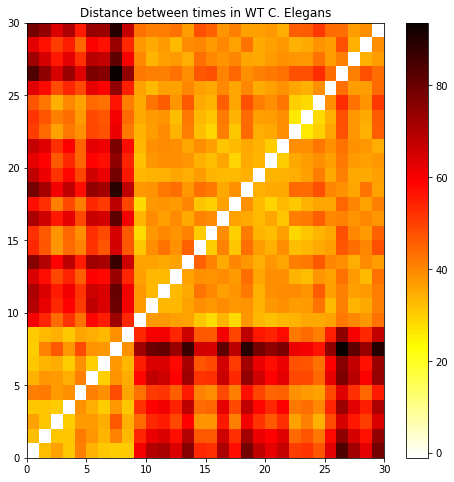

In [169]:
plot_2_examples(['hot_r'],(np.mat(b_mat)[oop]).T[oop])

In [172]:
b_cluster = oop
b_cluster

array([ 1,  8,  9, 10, 16, 17, 19, 20, 26,  0,  2,  3,  4,  5,  6,  7, 11,
       12, 13, 14, 15, 18, 21, 22, 23, 24, 25, 27, 28, 29])

In [125]:
#plot_2_examples(['hot_r'],np.mat(bg_mat))

In [126]:
'''x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]
x = np.flip(x, 1)
plot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))
sortlists.append(x)
sortlists'''

"x = np.argsort(bg_mat.sum(axis=0))[0]#[::-1]\nx = np.flip(x, 1)\nplot_2_examples(['hot_r'],np.mat(bg_mat[x][0]))\nsortlists.append(x)\nsortlists"

In [127]:
'''
trip = np.triu(np.mat(bg_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins =truncator )'''
'''
trip = bg_mat.sum(axis=0).tolist()[0]
trip

plt.hist(trip, bins = 15 )
'''

'\ntrip = bg_mat.sum(axis=0).tolist()[0]\ntrip\n\nplt.hist(trip, bins = 15 )\n'

In [128]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 75) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 7]);'''

"x_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum((abs(xi - x_d) < 75) for xi in trip)\n\nplt.fill_between(x_d, density, alpha=0.5)\n#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\n\nplt.axis([min(trip), max(trip), -0.1, 7]);"

In [129]:
'''from scipy.stats import norm
x_d = np.linspace(min(trip), max(trip), 2000)
density = sum(norm(xi,75).pdf(x_d) for xi in trip) * 20
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)
plt.axis([min(trip), max(trip), -0.5, 1]);'''

"from scipy.stats import norm\nx_d = np.linspace(min(trip), max(trip), 2000)\ndensity = sum(norm(xi,75).pdf(x_d) for xi in trip) * 20\nplt.fill_between(x_d, density, alpha=0.5)\nplt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)\nplt.axis([min(trip), max(trip), -0.5, 1]);"

In [81]:
#plot_2_examples(['hot_r'],np.mat(bs_mat))

In [82]:
'''trip = np.triu(np.mat(bs_mat))
trip = np.sort(trip.flatten())
trip = trip[int(len(trip)/2)+truncator:]

plt.hist(trip, bins = truncator )'''
''''''

''

In [177]:
'''x_d = np.linspace(min(trip), max(trip), 2000)
density = sum((abs(xi - x_d) < 5) for xi in trip)

plt.fill_between(x_d, density, alpha=0.5)
#plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.plot(trip, np.full_like(trip, -0.1), '|k', markeredgewidth=1)

plt.axis([min(trip), max(trip), -0.1, 110]);''' 

''''''

''

In [207]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html
slope_mat = []
for n in range(0,len(nameset)):
    slope_row = [];
    for m in range(0, n + 1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,dictset,n,m)
        '''if m2 > 1: 
            slope_row.append(1/m2)
        else:'''
        slope_row.append(m2)
    zee = ( [0] * (30 - m - 1))
    slope_mat.append(slope_row+zee)
    #print(len(zee))
#r_mat.reverse()
slope_mat = (np.mat(slope_mat).T + np.mat(slope_mat)) - np.diag([1]*len(slope_mat))
slope_mat = (np.mat(slope_mat))

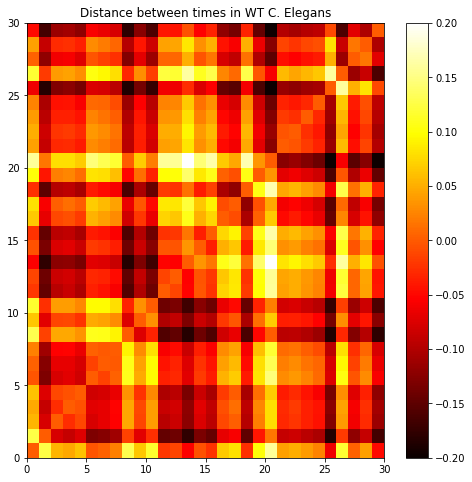

In [208]:
plot_2_examples(['hot'],np.mat(slope_mat)-1)#[oop])

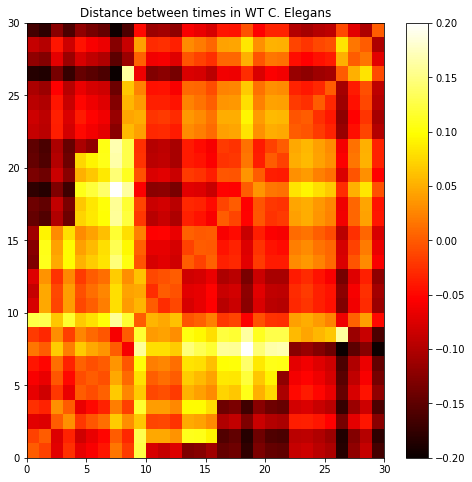

In [209]:
plot_2_examples(['hot'],(np.mat(slope_mat-1)[oop]).T[oop])

In [90]:
def dict_to_scatter_lineage(name,lis,x,y,img = False,seps='', tier = False):
    #plt.figure().clear()
    gong = ['AB','C','D','MS','E','P']
    Subsetylist = [[],[],[],[],[],[]]
    Subsetxlist = [[],[],[],[],[],[]]
    xaxis = [];yaxis = []
    target_xaxis=[];target_yaxis=[]
    for n in (list(set(lis[x]).intersection(set(lis[y])))):
        for m in range(0,len(gong)):
            if gong[m] in n:
                Subsetylist[m].append(lis[x][n]);Subsetxlist[m].append(lis[y][n])
                continue
        xaxis.append(lis[x][n]);yaxis.append(lis[y][n])
    target_xaxis = np.array(target_xaxis);xaxis = np.array(xaxis)
    m, b, r, p_value, std_err = stats.linregress(np.append(xaxis,target_xaxis),yaxis+target_yaxis)
    #switch to siegelslope & theilsslope functions?
    name1,name2 = name[x].split('/')[-1][:-4],name[y].split('/')[-1][:-4]
    name1,name2 = name1[18:-7],name2[18:-7]
    plt.title('Embryonic Timing Discrepancies between '+name1+' &\n'+name2+' Common Nodes')
    plt.xlabel(name1+'\nDivision Event Timing Increments');plt.ylabel(name2+'\nDivision Event Timing Increments')
    for n in range(len(Subsetxlist)):
        plt.scatter(np.array(Subsetxlist[n]),Subsetylist[n], label=gong[n], s = [30] * len(Subsetxlist[n]), alpha = .35)
    plt.legend(loc='upper left')
    fig = plt.figure(1)
    rect = fig.patch
    rect.set_facecolor("white")
    hold = name1+'('+str(x)+')x'+name2+'('+str(y)+')_common'
    #plt.savefig(hold, facecolor=fig.get_facecolor())
    plt.show()
    print(name1+'('+str(x)+')x'+name2+'('+str(y)+')')
    plt.close()
    print(x,y)
    


In [91]:
os.getcwd()

'/home/gunalan/Desktop/C_Elegans_proj/Iteration_1/WT_to_tree_5'

In [92]:
#os.chdir('../')

In [93]:
#directory = directory + '/figures/'
#os.chdir(directory)

In [94]:
'''
for n in range(0,len(nameset)):
    for m in range(0,n):
        print(n,m)
        dict_to_scatter_lineage(nameset,dictset,n,m,img=True,seps = 'AB') '''

"\nfor n in range(0,len(nameset)):\n    for m in range(0,n):\n        print(n,m)\n        dict_to_scatter_lineage(nameset,dictset,n,m,img=True,seps = 'AB') "

In [279]:
ABa_list = [];ABp_list = [];E_list = [];MS_list = [];C_list = [];D_list = [];P_list = []
ABa_s = dict();ABp_s = dict();E_s = dict();MS_s = dict();C_s = dict();D_s = dict();P_s = dict()

for m in range(0,len(dictset)):
    for n in list(dictset[m]):
        #print(n)
        if 'ABa' in n: ABa_s[n] = dictset[m][n]
        elif 'ABp' in n: ABp_s[n] = dictset[m][n]
        elif 'E' in n: E_s[n] = dictset[m][n]
        elif 'MS' in n: MS_s[n] = dictset[m][n]
        elif 'C' in n: C_s[n] = dictset[m][n]
        elif 'D' in n: D_s[n] = dictset[m][n]
        elif 'P' in n: P_s[n] = dictset[m][n]
    ABa_list.append(ABa_s);ABp_list.append(ABp_s);E_list.append(E_s)
    MS_list.append(MS_s);C_list.append(C_s);D_list.append(D_s);P_list.append(P_s)
    ABa_s = dict();ABp_s = dict();E_s = dict();MS_s = dict();C_s = dict();D_s = dict();P_s = dict()

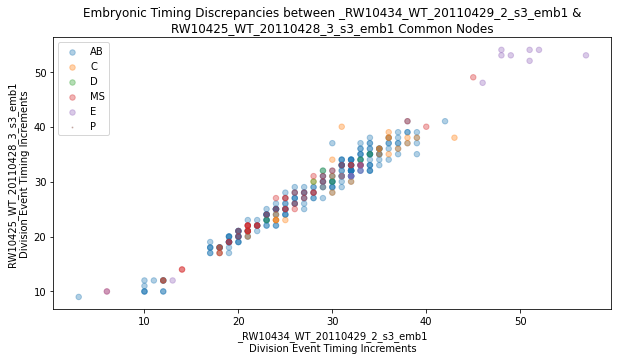

_RW10434_WT_20110429_2_s3_emb1(1)xRW10425_WT_20110428_3_s3_emb1(20)
1 20


In [309]:
dict_to_scatter_lineage(nameset,dictset,1,20,img=True)

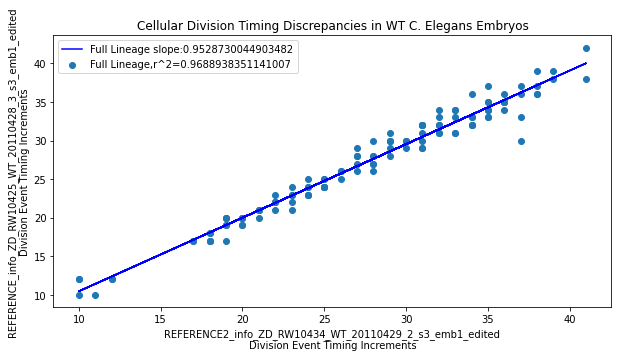

In [315]:
dict_to_scatter(nameset,ABa_list,1,20,img=True, seps = '')

In [320]:
def branch_distance(dict1,dict2): #issa metric from deeds
    branch_dist = 0
    for n in list(set(dict1).intersection(set(dict2))):
        branch_dist = branch_dist + (dict1[n]-dict2[n])**2
        #print(n,(dict1[n]-dict2[n])**2, branch_dist)
    return (np.sqrt(branch_dist))

In [340]:
ABa_r_mat = [];ABa_b_mat = [];ABp_r_mat=[];ABp_b_mat=[]
for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,ABa_list,n,m)
        r_row.append(r**2)
        g_row.append(branch_distance(ABa_list[n],ABa_list[m]))
        
        m2,b,r,name1,name2 = dict_to_scatter(nameset,ABp_list,n,m)
        s_row.append(r**2)
        gs_row.append(branch_distance(ABp_list[n],ABp_list[m]))
    zee = ( [0] * (30 - m - 1))
    ABa_r_mat.append(r_row+zee);ABa_b_mat.append(g_row+zee);ABp_r_mat.append(s_row+zee);ABp_b_mat.append(gs_row+zee)
    #print(len(zee))

ABa_r_mat = (np.mat(ABa_r_mat).T + np.mat(ABa_r_mat)) - np.diag([1]*len(ABa_r_mat))
ABa_b_mat = (np.mat(ABa_b_mat).T + np.mat(ABa_b_mat)) - np.diag([1]*len(ABa_b_mat))
ABp_r_mat = (np.mat(ABp_r_mat).T + np.mat(ABp_r_mat)) - np.diag([1]*len(ABp_r_mat))
ABp_b_mat = (np.mat(ABp_b_mat).T + np.mat(ABp_b_mat)) - np.diag([1]*len(ABp_b_mat))

sorttypes = ['cycle time','birth time', 'T.E.D', 'B.E.D. Cycle Time','B.E.D. Birth Time']
sortlists = []

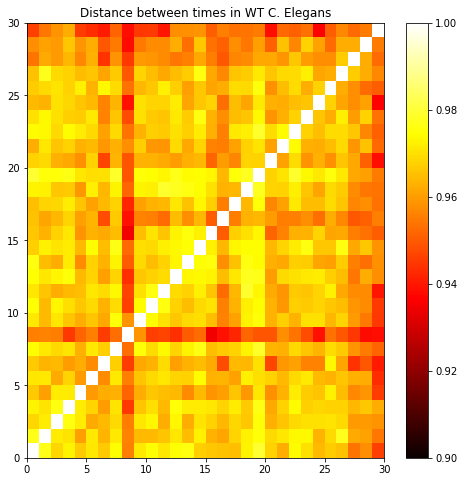

In [341]:
plot_2_examples(['hot'],np.mat(ABa_r_mat))#[oop])

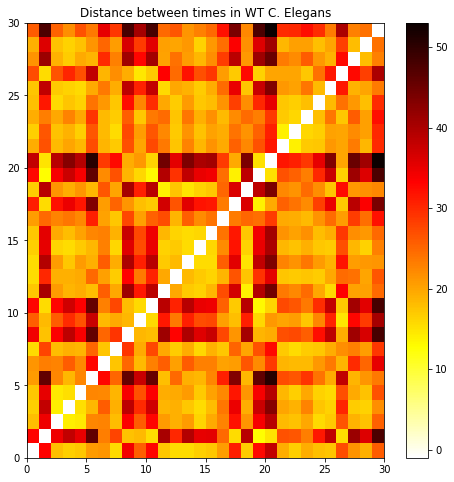

In [342]:
plot_2_examples(['hot_r'],np.mat(ABa_b_mat))#[oop])

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

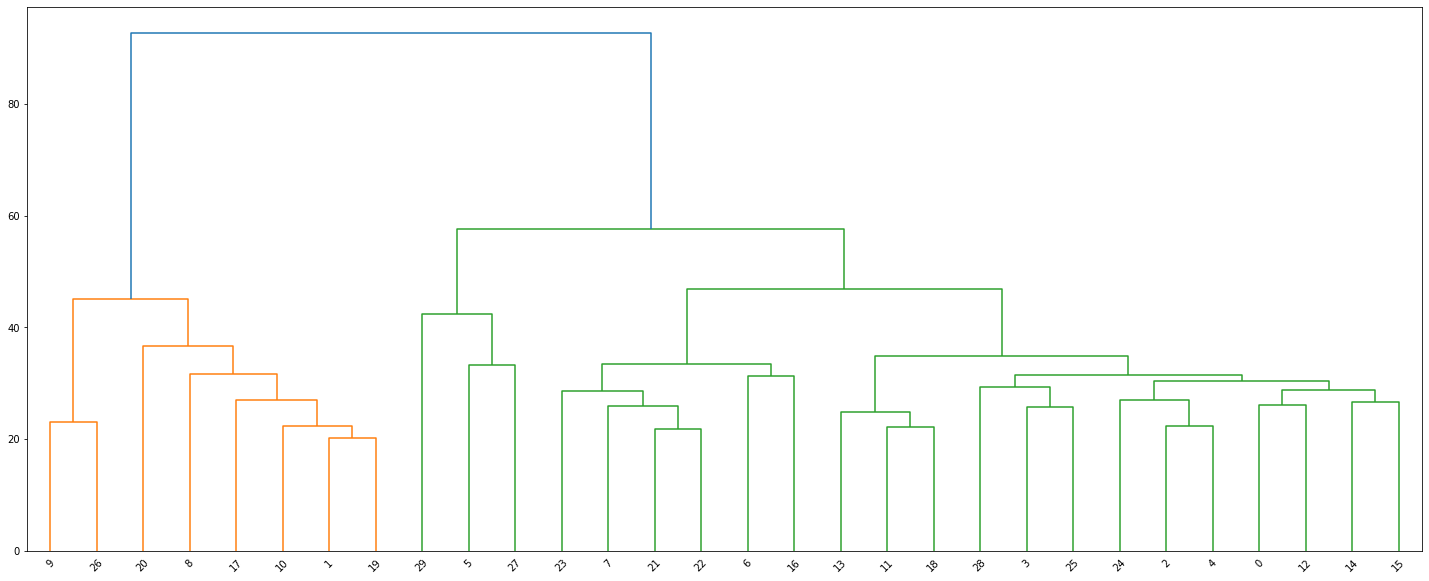

In [343]:
Z = linkage(np.mat(ABa_b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust') 

In [344]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23,
         24, 25, 27, 28, 29]),),
 (array([ 1,  8,  9, 10, 17, 19, 20, 26]),))

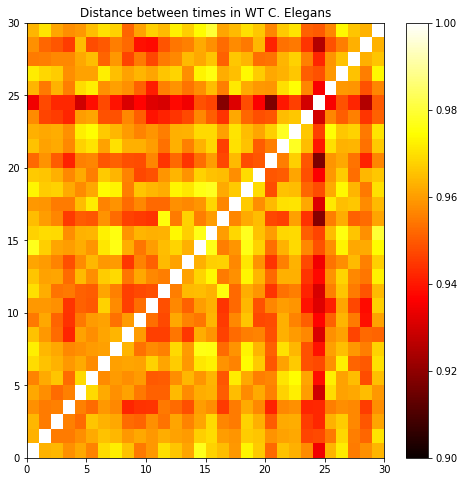

In [345]:
plot_2_examples(['hot'],np.mat(ABp_r_mat))#[oop])

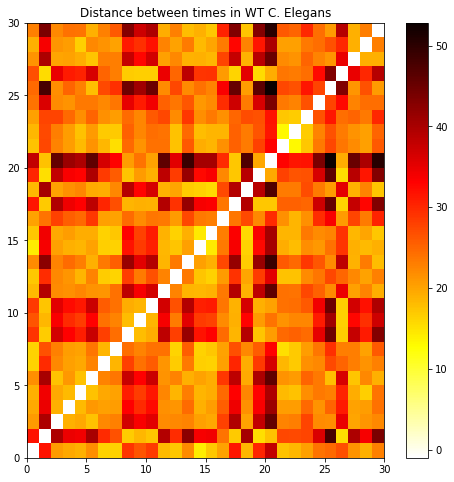

In [346]:
plot_2_examples(['hot_r'],np.mat(ABp_b_mat))#[oop])

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

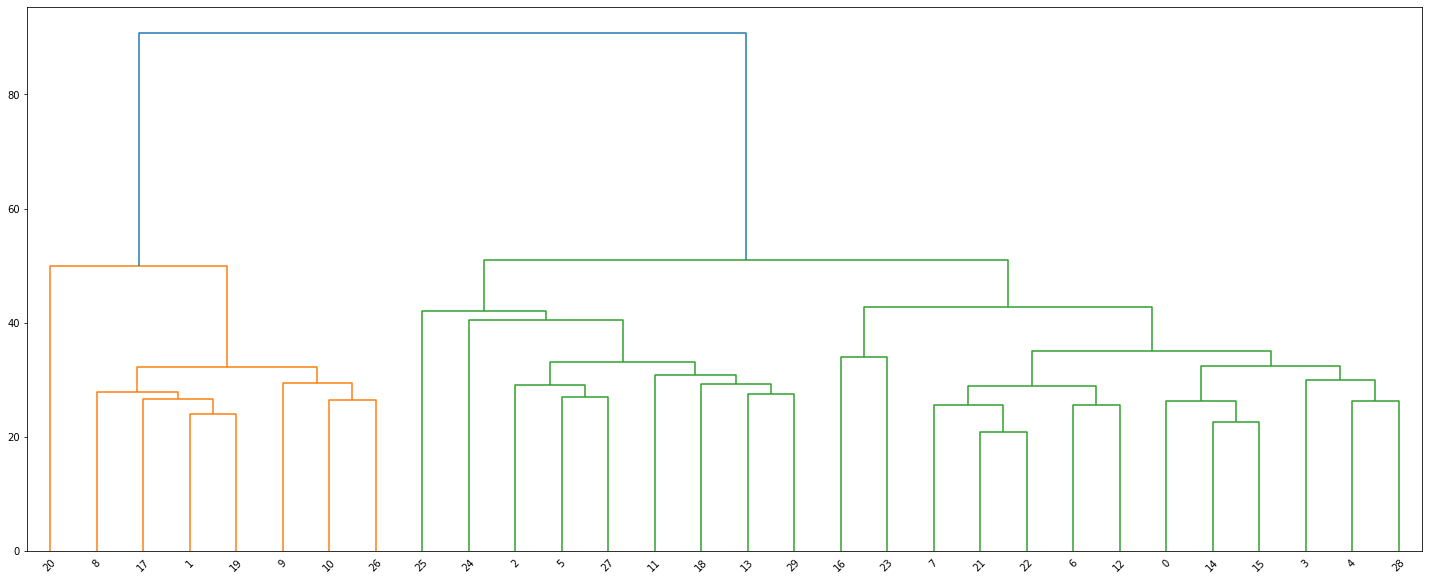

In [347]:
Z = linkage(np.mat(ABp_b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust') 

In [348]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 16, 18, 21, 22, 23,
         24, 25, 27, 28, 29]),),
 (array([ 1,  8,  9, 10, 17, 19, 20, 26]),))

In [354]:
E_r_mat = [];E_b_mat = [];MS_r_mat=[];MS_b_mat=[]
for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,E_list,n,m)
        r_row.append(r**2)
        g_row.append(branch_distance(E_list[n],E_list[m]))
        
        m2,b,r,name1,name2 = dict_to_scatter(nameset,MS_list,n,m)
        s_row.append(r**2)
        gs_row.append(branch_distance(MS_list[n],MS_list[m]))
    zee = ( [0] * (30 - m - 1))
    E_r_mat.append(r_row+zee);E_b_mat.append(g_row+zee);MS_r_mat.append(s_row+zee);MS_b_mat.append(gs_row+zee)
    #print(len(zee))

E_r_mat = (np.mat(E_r_mat).T + np.mat(E_r_mat)) - np.diag([1]*len(E_r_mat))
E_b_mat = (np.mat(E_b_mat).T + np.mat(E_b_mat)) - np.diag([1]*len(E_b_mat))
MS_r_mat = (np.mat(MS_r_mat).T + np.mat(MS_r_mat)) - np.diag([1]*len(MS_r_mat))
MS_b_mat = (np.mat(MS_b_mat).T + np.mat(MS_b_mat)) - np.diag([1]*len(MS_b_mat))

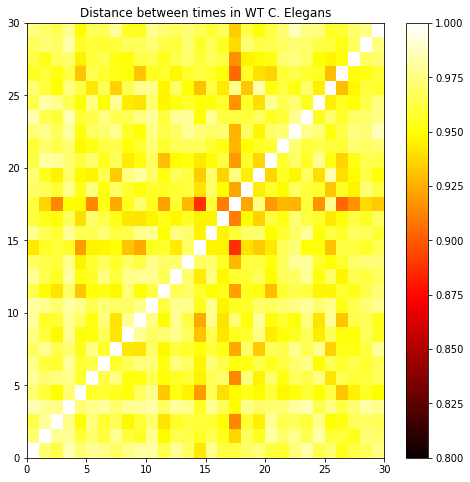

In [355]:
plot_2_examples(['hot'],np.mat(MS_r_mat))

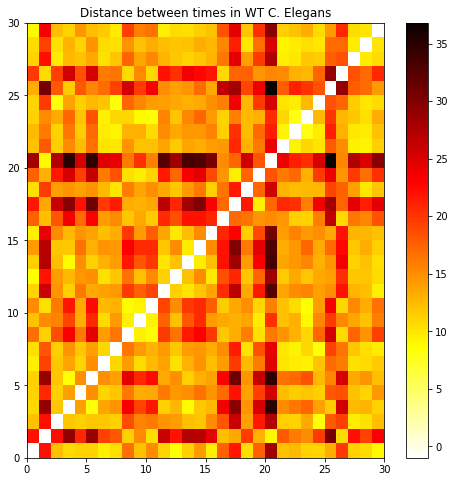

In [356]:
plot_2_examples(['hot_r'],np.mat(MS_b_mat))#[oop])

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

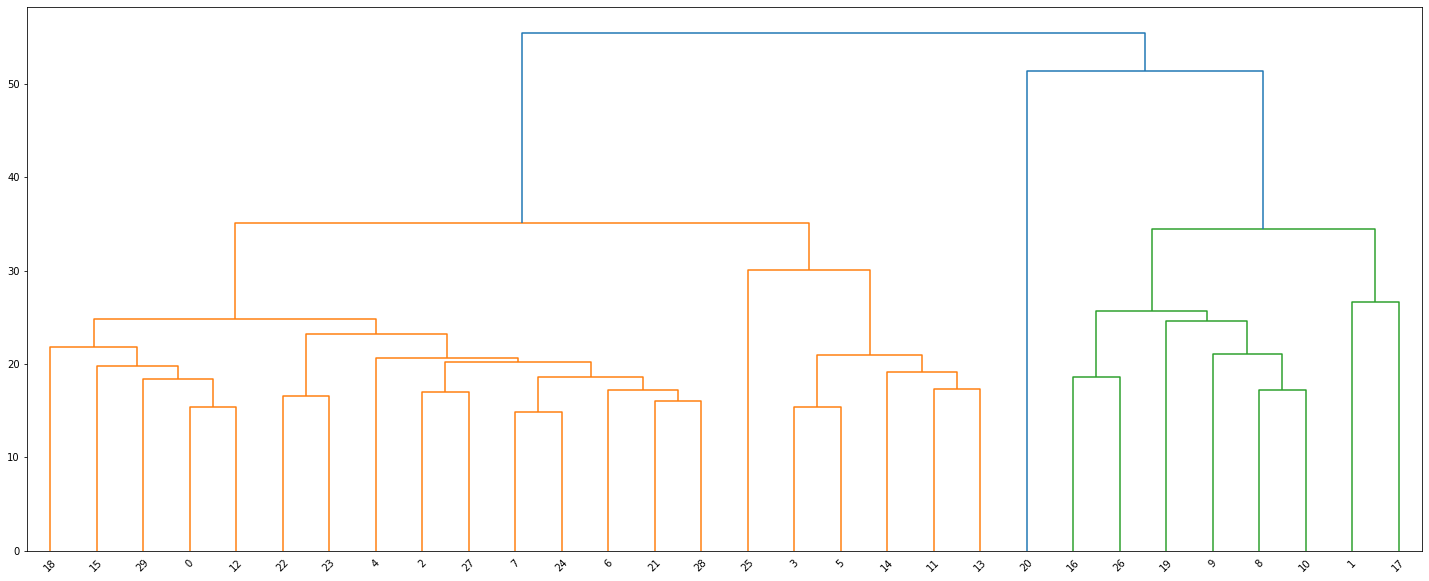

In [358]:
Z = linkage(np.mat(MS_b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust') 

In [359]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),))

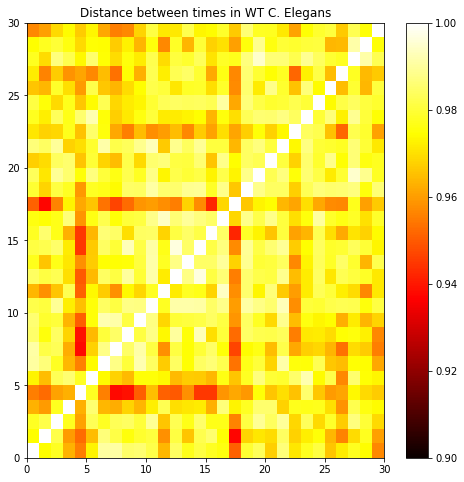

In [360]:
plot_2_examples(['hot'],np.mat(E_r_mat))

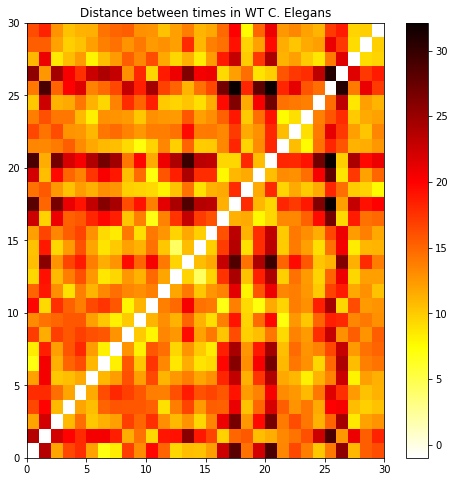

In [361]:
plot_2_examples(['hot_r'],np.mat(E_b_mat))#[oop])

array([2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

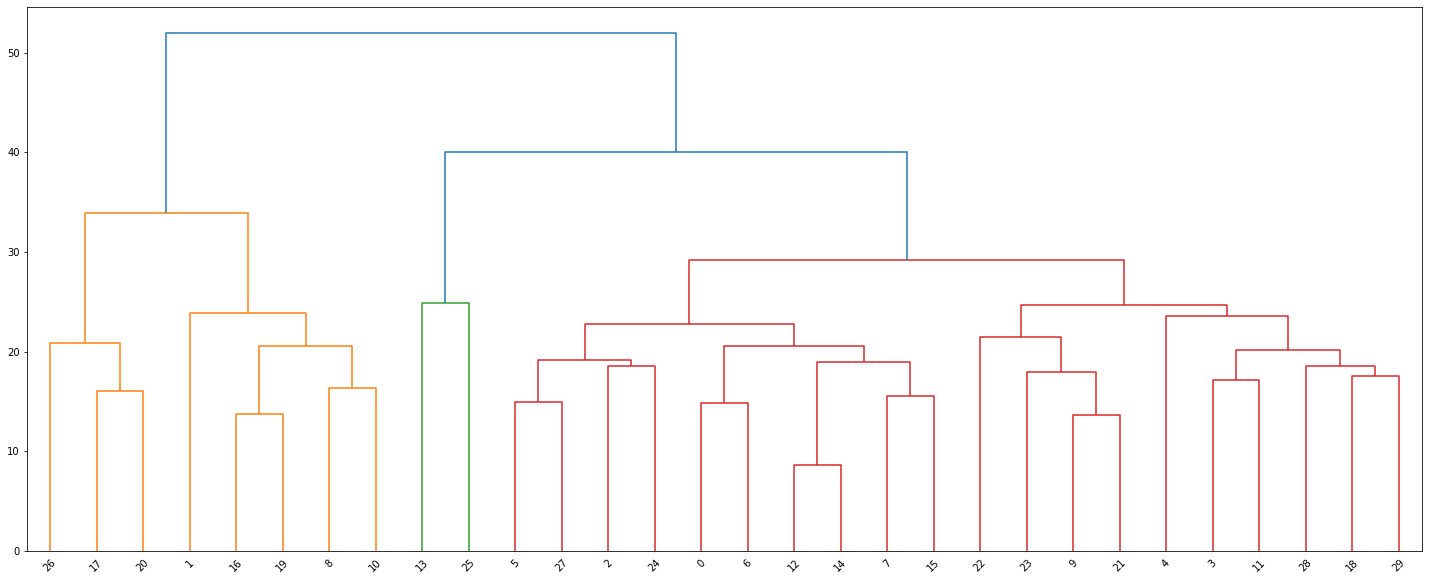

In [365]:
Z = linkage(np.mat(E_b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust') 

In [366]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 0,  2,  3,  4,  5,  6,  7,  9, 11, 12, 13, 14, 15, 18, 21, 22, 23,
         24, 25, 27, 28, 29]),),
 (array([ 1,  8, 10, 16, 17, 19, 20, 26]),))

In [367]:
C_r_mat = [];C_b_mat = [];D_r_mat=[];D_b_mat=[]
for n in range(0,len(nameset)):
    r_row = [];g_row = [];s_row=[];gs_row=[]
    for m in range(0,n+1):
        m2,b,r,name1,name2 = dict_to_scatter(nameset,C_list,n,m)
        r_row.append(r**2)
        g_row.append(branch_distance(C_list[n],C_list[m]))
        
        m2,b,r,name1,name2 = dict_to_scatter(nameset,D_list,n,m)
        s_row.append(r**2)
        gs_row.append(branch_distance(D_list[n],D_list[m]))
    zee = ( [0] * (30 - m - 1))
    C_r_mat.append(r_row+zee);C_b_mat.append(g_row+zee);D_r_mat.append(s_row+zee);D_b_mat.append(gs_row+zee)
    #print(len(zee))

C_r_mat = (np.mat(C_r_mat).T + np.mat(C_r_mat)) - np.diag([1]*len(C_r_mat))
C_b_mat = (np.mat(C_b_mat).T + np.mat(C_b_mat)) - np.diag([1]*len(C_b_mat))
D_r_mat = (np.mat(D_r_mat).T + np.mat(D_r_mat)) - np.diag([1]*len(D_r_mat))
D_b_mat = (np.mat(D_b_mat).T + np.mat(D_b_mat)) - np.diag([1]*len(D_b_mat))

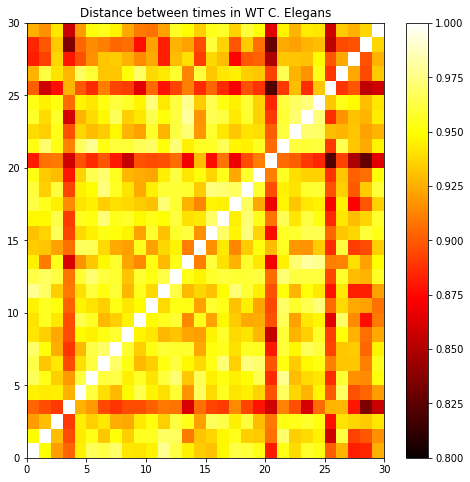

In [368]:
plot_2_examples(['hot'],np.mat(C_r_mat))

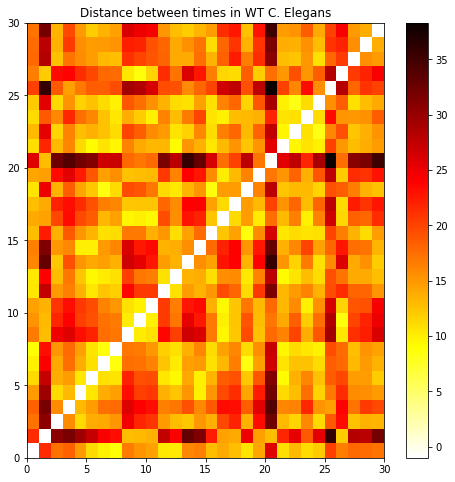

In [369]:
plot_2_examples(['hot_r'],np.mat(C_b_mat))

array([1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

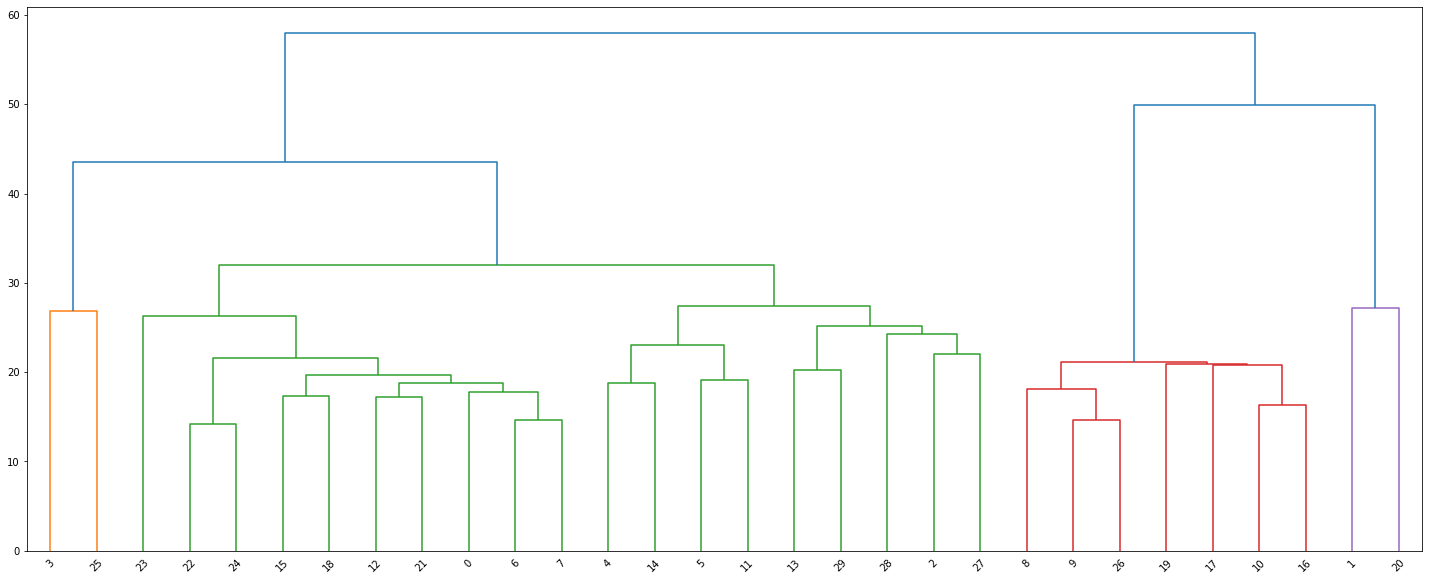

In [370]:
Z = linkage(np.mat(C_b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=2, criterion='maxclust') 

In [371]:
np.where((fcluster(Z, t=2, criterion='maxclust') > 1)),np.where((fcluster(Z, t=2, criterion='maxclust') < 2))

((array([ 1,  8,  9, 10, 16, 17, 19, 20, 26]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14, 15, 18, 21, 22, 23, 24,
         25, 27, 28, 29]),))

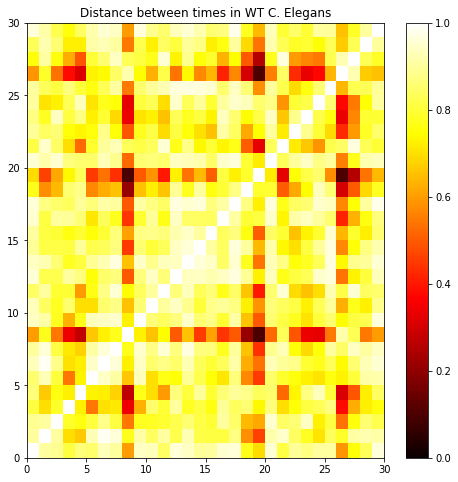

In [372]:
plot_2_examples(['hot'],np.mat(D_r_mat))

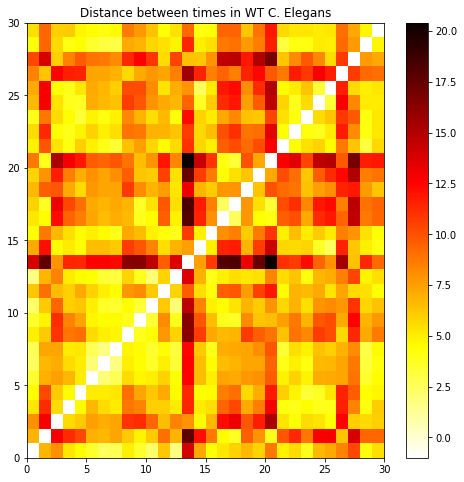

In [373]:
plot_2_examples(['hot_r'],np.mat(D_b_mat))

array([2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 2, 3, 3, 2, 3, 3, 2,
       2, 2, 2, 2, 3, 1, 2, 2], dtype=int32)

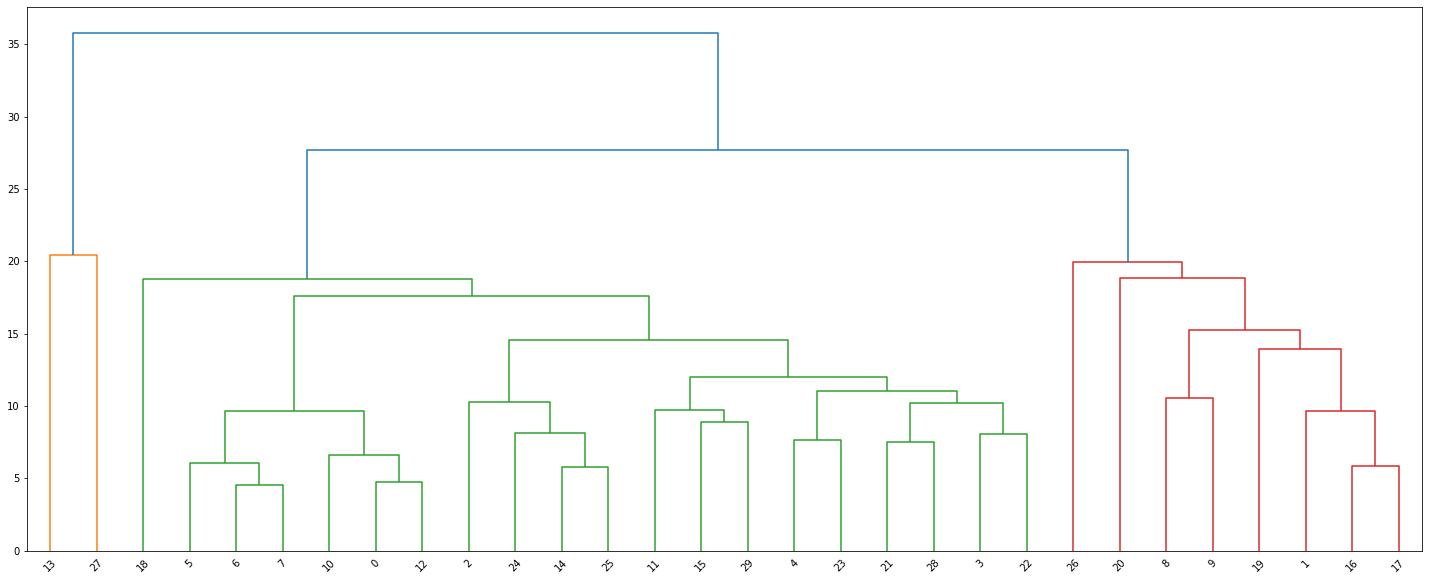

In [376]:
Z = linkage(np.mat(D_b_mat), 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
fcluster(Z, t=3, criterion='maxclust') 

In [378]:
np.where((fcluster(Z, t=3, criterion='maxclust') == 1)),np.where((fcluster(Z, t=3, criterion='maxclust') == 2)),np.where((fcluster(Z, t=3, criterion='maxclust') == 3))

((array([13, 27]),),
 (array([ 0,  2,  3,  4,  5,  6,  7, 10, 11, 12, 14, 15, 18, 21, 22, 23, 24,
         25, 28, 29]),),
 (array([ 1,  8,  9, 16, 17, 19, 20, 26]),))